In [1]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import math

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam

# plot style
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
# the class is responsible for reading the csv. file (Voevodeships) 

class Data_Reader_Voev:
    
    def __init__(self, path_to_file):
        self.data = ''
        self.delta = ''
        self.clean_data()
        
        self.path_to_file = path_to_file
        
        self.read_data()
        self.transform_data()
        self.separate_data()
        self.transforrm_to_delta_voivodeships()
        self.concatenate_data()
    
    def read_data(self):
        self.data = pd.DataFrame()
        #for loop that allows for read all csv files from directory, and glue this data
        for file_name in glob.glob(f"{self.path_to_file}/*.csv"):
            tmp = pd.read_csv(file_name, low_memory=False)
            self.data = pd.concat([self.data, tmp],axis=0)

    def transform_data(self):
        self.data = self.data.drop(columns="County/City") #drop unnecessary column
        self.data["Last Update"] = self.data["Last Update"].str.replace("( ).*","") #Delete "time" from Last Update
        self.data = self.data.rename({"Last Update": "Date"}, axis=1) #change the column "Last Update" for "Date"

    def separate_data(self):
        self.dolnoslaskie = self.data[self.data["Voivodeship"] == "dolnośląskie"]
        self.kujawsko_pomorskie = self.data[self.data["Voivodeship"] == "kujawsko-pomorskie"]
        self.lubelskie = self.data[self.data["Voivodeship"] == "lubelskie"]
        self.lubuskie = self.data[self.data["Voivodeship"] == "lubuskie"]
        self.lodzkie = self.data[self.data["Voivodeship"] == "łódzkie"]
        self.malopolskie = self.data[self.data["Voivodeship"] == "małopolskie"]
        self.mazowieckie = self.data[self.data["Voivodeship"] == "mazowieckie"]
        self.opolskie = self.data[self.data["Voivodeship"] == "opolskie"]
        self.podkarpackie = self.data[self.data["Voivodeship"] == "podkarpackie"]
        self.podlaskie = self.data[self.data["Voivodeship"] == "podlaskie"]
        self.pomorskie = self.data[self.data["Voivodeship"] == "pomorskie"]
        self.slaskie = self.data[self.data["Voivodeship"] == "śląskie"]
        self.swietokrzyskie = self.data[self.data["Voivodeship"] == "świętokrzyskie"]
        self.warminsko_mazurskie = self.data[self.data["Voivodeship"] == "warmińsko-mazurskie"]
        self.wielkopolskie = self.data[self.data["Voivodeship"] == "wielkopolskie"]
        self.zachodniopomorskie = self.data[self.data["Voivodeship"] == "zachodniopomorskie"]
        
    def clean_data(self):
        self.dolnoslaskie = ''
        self.kujawsko_pomorskie = ''
        self.lubelskie = ''
        self.lubuskie = ''
        self.lodzkie = ''
        self.malopolskie = ''
        self.mazowieckie = ''
        self.opolskie = ''
        self.podkarpackie = ''
        self.podlaskie = ''
        self.pomorskie = ''
        self.slaskie = ''
        self.swietokrzyskie = ''
        self.warminsko_mazurskie = ''
        self.wielkopolskie = ''
        self.zachodniopomorskie = ''
    
    def voivodeships_delta(self, dataframe):
        tmp = dataframe['Deaths'].values
        return np.subtract(tmp[1:], tmp[:-1])

    def create_delta_dataframe(self, data):
        return pd.DataFrame(self.voivodeships_delta(data), columns = ['Deaths'])
    
    def transforrm_to_delta_voivodeships(self):
        self.dolnoslaskie = self.create_delta_dataframe(self.dolnoslaskie)
        self.kujawsko_pomorskie = self.create_delta_dataframe(self.kujawsko_pomorskie)
        self.lubelskie = self.create_delta_dataframe(self.lubelskie)
        self.lubuskie = self.create_delta_dataframe(self.lubuskie)
        self.lodzkie = self.create_delta_dataframe(self.lodzkie)
        self.malopolskie = self.create_delta_dataframe(self.malopolskie)
        self.mazowieckie = self.create_delta_dataframe(self.mazowieckie)
        self.opolskie = self.create_delta_dataframe(self.opolskie)
        self.podkarpackie = self.create_delta_dataframe(self.podkarpackie)
        self.podlaskie = self.create_delta_dataframe(self.podlaskie)
        self.pomorskie = self.create_delta_dataframe(self.pomorskie)
        self.slaskie = self.create_delta_dataframe(self.slaskie)
        self.swietokrzyskie = self.create_delta_dataframe(self.swietokrzyskie)
        self.warminsko_mazurskie = self.create_delta_dataframe(self.warminsko_mazurskie)
        self.wielkopolskie = self.create_delta_dataframe(self.wielkopolskie)
        self.zachodniopomorskie = self.create_delta_dataframe(self.zachodniopomorskie)
    
    def plot_voivodeships(self):
        figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
        plt.grid()
        voivodeships = [[dolnoslaskie, kujawsko_pomorskie, lubelskie, lubuskie],
                       [lodzkie, malopolskie, mazowieckie, opolskie],
                       [podkarpackie, podlaskie, pomorskie, slaskie],
                       [swietokrzyskie, warminsko_mazurskie, wielkopolskie, zachodniopomorskie]]
        
        for i in range(4):
            for j in range(4):
                axes[i, j].plot(voivodeships[i][j], c=np.random.rand(3,))
        
        title = [['dolnoslaskie', 'kujawsko_pomorskie', 'lubelskie', 'lubuskie'], 
         ['lodzkie', 'malopolskie', 'mazowieckie', 'opolskie'],
         ['podkarpackie', 'podlaskie', 'pomorskie', 'slaskie'],
         ['swietokrzyskie', 'warminsko_mazurskie', 'wielkopolskie', 'zachodniopomorskie']]
        for i in range(4):
            for j in range(4):
                axes[i, j].set_title(title[i][j])
                axes[i, j].set_xlabel('days')
                axes[i, j].set_ylabel('deaths')
                axes[i, j].grid()
        
        figure.tight_layout()
    
    def concatenate_data(self):
        # All Poland delta
        voivodeships = [self.kujawsko_pomorskie, self.lubelskie, self.lubuskie,
                       self.lodzkie, self.malopolskie, self.mazowieckie, self.opolskie,
                       self.podkarpackie, self.podlaskie, self.pomorskie, self.slaskie,
                       self.swietokrzyskie, self.warminsko_mazurskie, self.wielkopolskie, self.zachodniopomorskie]
        self.delta = self.dolnoslaskie 
        
        for i in voivodeships:
            self.delta = self.delta + i
        
        list_ = []

        for a in self.delta['Deaths']:
            list_.append(a)

        self.delta = np.array(list_).reshape(-1, 1)
        
    def plot_data(self):
        plt.plot(self.delta)

In [3]:
# the class is responsible for reading the csv. file (Poland) 

class Data_Reader_Poland():
    
    def __init__(self, path_to_file):
        self.path_to_file = path_to_file
        self.data = ''
        self.delta = ''
        self.read_data()
        self.set_date_index()
        self.get_delta_deaths()
    
    def read_data(self):
        self.data = pd.read_csv(self.path_to_file)
        
    def set_date_index(self):
        self.data.set_index('Timestamp')
        
    def plot_deaths(self):
        plt.figure(figsize=(12,6))
        plt.title('Deaths')
        plt.plot(self.data['Deaths'])
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Deaths', fontsize=18)
        plt.show()
        
    def get_delta_deaths(self):
        tmp = self.data.filter(['Deaths'])
        deaths_by_day = []
        delta_by_day = []
        for i in range(len(tmp)):
           deaths_by_day.append(tmp.values[i][0])
        for i in range(len(tmp) - 1):
           delta_by_day.append(deaths_by_day[i+1] - deaths_by_day[i])
        self.delta = np.array(delta_by_day).reshape(-1, 1)
        
    def plot_delta_deaths(self):
        plt.figure(figsize=(12,6))
        plt.title('Deaths')
        plt.plot(self.delta)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Deaths', fontsize=18)
        plt.show()

In [4]:
# the class is responsible for converting the received data

class Data_Preprocessing:
    
    def __init__(self, data, ratio):
        self.ratio = ratio # ex. ratio = 0.8 -> 80 - train, 20 - test
        self.data = data
        self.dataframe = pd.DataFrame(data=self.data,columns=['Deaths'])
        self.x_train = [] # training features, independent training variables
        self.y_train = [] # target features, dependent training variables
        self.x_test = []
        self.y_test = []
        self.training_data_len = ''
        self.scaler = ''
        self.scaled_delta = ''
        self.train_data = ''
        self.test_data = ''
        self.prediction = ''
        self.valid = ''
        
        
        self.set_training_data_length()
        self.data_scale()
        # training data
        self.create_training_set()
        self.split_training_set()
        self.reshape_x_train()
        # testing data
        self.create_testing_set()
        self.split_testing_set()
        self.reshape_x_test()
        
        
    def set_training_data_length(self):
        self.training_data_len = math.ceil(len(self.data) * self.ratio) # 55
        
    def data_scale(self):
        self.scaler = MinMaxScaler(feature_range=(0,1))
        self.scaled_delta = self.scaler.fit_transform(self.data)
    
    # Training set
    def create_training_set(self):
        self.train_data = self.scaled_delta[0:self.training_data_len , :] 
        
    # we take last 7 days for prediction
    def split_training_set(self):
        for i in range(7, len(self.train_data)):
           # we append to x_train the last 7 values
           self.x_train.append(self.train_data[i-7:i, 0])
           self.y_train.append(self.train_data[i, 0])
        # convert the x_train and y_train to numpy arrays that we will use yo train our neural network
        self.x_train, self.y_train = np.array(self.x_train), np.array(self.y_train)
        
    # we are reshaping the x_train, because the LSTM neural network expect, that the input will be
    # 3-dimensional array. Our x_train is 2-dimensional array.
    def reshape_x_train(self):
        self.x_train = np.reshape(self.x_train, (self.x_train.shape[0], self.x_train.shape[1], 1))
    
    # Testing set
    def create_testing_set(self):
        self.test_data = self.scaled_delta[self.training_data_len - 7:, :]

    def split_testing_set(self):
        for i in range(7, len(self.test_data)):
           # we append to x_train the last 7 values
           self.x_test.append(self.test_data[i-7:i, 0])
           self.y_test.append(self.test_data[i, 0])
        # convert the x_train and y_train to numpy arrays that we will use yo train our neural network
        self.x_test, self.y_test = np.array(self.x_test), np.array(self.y_test)

    def reshape_x_test(self):
        self.x_test = np.reshape(self.x_test, (self.x_test.shape[0], self.x_test.shape[1], 1))
        
    def get_prediction_array(self, sequence):
        self.prediction = sequence
        
    def rescale(self):
        self.predictions = self.scaler.inverse_transform(self.prediction)
        
    
    # Mean Squared Error
    def mse_(self):
        return np.mean(self.prediction - self.y_test)

    # Root Mean Squared Error    
    def rmse(self):
        return np.sqrt(self.mse_())
    
    # Normalized Root Mean Squared Error
    def nrmse(self):
        denominator = self.y_test.max() - self.y_test.min()
        return self.rmse()/denominator
    
    # Mean Error
    def me(self):
        return np.mean(self.y_test - self.prediction)
    
    # Mean Absolute Error
    def mae(self):
        return np.mean(np.abs(self.y_test - self.prediction))
    
    
    def plot_prediction(self, title):
        self.train = self.dataframe[:self.training_data_len]
        self.valid = self.dataframe[self.training_data_len:]
        
        self.valid['Predictions'] = self.predictions
        
        # Visualize the data
        plt.figure(figsize=(16,8))
        plt.title(title)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Deaths', fontsize=18)
        plt.plot(self.train['Deaths'])
        plt.plot(self.valid[['Deaths', 'Predictions']])
        plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
        plt.show()
        
    def show_valid_data(self):
        print(self.valid)

In [5]:
# the class is responsible for LSTM model creation with additional features

class My_LSTM:

    def __init__(self, data, lstm_1, lstm_2, dense_3, epochs):
        self.x_train = data.x_train
        self.y_train = data.y_train
        self.x_test = data.x_test
        self.y_test = data.y_test
        self.lstm_1 = lstm_1
        self.lstm_2 = lstm_2
        self.dense_3 = dense_3
        self.epochs = epochs
        self.model = ''
        self.history = ''
        self.build_model()
        self.compile_model()
        self.fit_model()
        self.save_model()

    def build_model(self):
        self.model = Sequential()
        self.model.add(LSTM(self.lstm_1, return_sequences=True, 
                            input_shape = (self.x_train.shape[1], 1)))
        self.model.add(LSTM(self.lstm_2, return_sequences=False))
        self.model.add(Dense(self.dense_3, activation='linear', input_shape = (self.x_train.shape[1], 1)))
        self.model.add(Dense(1))

    def compile_model(self):
        self.model.compile(optimizer='adam', 
                           loss='mse', metrics=['mean_absolute_error'])

    def fit_model(self):
        self.history = self.model.fit(self.x_train, self.y_train, validation_data=(self.x_test, self.y_test), batch_size=1, 
                       epochs=self.epochs)

    def save_model(self):
        self.model.save('lstm_model.h5')

    def network_architecture(self):
        plot_model(self.model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

In [6]:
# the class is responsible for time series predictions

class Predictor:
    
    def __init__(self, predict_period, data):    #data = preprocessing_data
        self.scaler = ''
        self.last_7_days = ''
        self.predict_period = predict_period
        self.data = data
        self.dataframe = data.dataframe
        
        self.get_last_7_days()
        self.predict()
        
    def get_last_7_days(self):
        self.last_7_days = self.data.dataframe['Deaths'].values[-7:].reshape(-1, 1)
        
        
    def predict(self):
        for i in range(self.predict_period):
           self.last_7_days_scaled = self.data.scaler.transform(self.last_7_days[-7:])
           X_test = []
           X_test.append(self.last_7_days_scaled)
           X_test = np.array(X_test)

           X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
           pred_deaths = lstm.model.predict(X_test)
           pred_deaths = self.data.scaler.inverse_transform(pred_deaths)
           self.last_7_days = np.concatenate((self.last_7_days, pred_deaths), axis=0)
            
    def plot(self):
        self.train = self.dataframe[:self.data.training_data_len]
        self.valid = self.dataframe[self.data.training_data_len:]
        
        self.valid['Predictions'] = self.data.predictions

        # Visualize the data
        plt.figure(figsize=(16,8))
        plt.title('Model')
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Deaths', fontsize=18)
        plt.plot(self.train['Deaths'], 'r', linewidth=5)
            
        plt.plot(self.valid[['Deaths', 'Predictions']])
        
        # define x - axis for deaths data forecasting for 40 days
        x1 = []
        for i in range(40):
            x1.append(i + 68)
    
        plt.plot(x1, self.last_7_days[-self.predict_period:], color='magenta', linestyle='dashed',
                 linewidth=1, marker='H',markerfacecolor='blue', markersize=3)
        plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='lower right')
        plt.show()

#  Voivodeships  COVID19 data

In [7]:
# read covid19 data by voivodeships from 17.03.2020 to 24.05.2020
covid19_data = Data_Reader_Voev('covid19_data')

# transform data
preprocessing_data = Data_Preprocessing(covid19_data.delta, 0.8)

# create neural network
lstm = My_LSTM(preprocessing_data, 200, 200, 200, 100)

Train on 48 samples, validate on 13 samples
Epoch 1/100
48/48 [==============================] - 1s 31ms/step - loss: 0.0433 - mean_absolute_error: 0.1683 - val_loss: 0.0668 - val_mean_absolute_error: 0.2237
Epoch 2/100
48/48 [==============================] - 1s 16ms/step - loss: 0.0460 - mean_absolute_error: 0.1738 - val_loss: 0.0686 - val_mean_absolute_error: 0.2280
Epoch 3/100
48/48 [==============================] - 1s 16ms/step - loss: 0.0447 - mean_absolute_error: 0.1719 - val_loss: 0.0609 - val_mean_absolute_error: 0.1801
Epoch 4/100
48/48 [==============================] - 1s 15ms/step - loss: 0.0468 - mean_absolute_error: 0.1776 - val_loss: 0.0876 - val_mean_absolute_error: 0.2615
Epoch 5/100
48/48 [==============================] - 1s 15ms/step - loss: 0.0543 - mean_absolute_error: 0.1944 - val_loss: 0.0625 - val_mean_absolute_error: 0.2163
Epoch 6/100
48/48 [==============================] - 1s 15ms/step - loss: 0.0394 - mean_absolute_error: 0.1620 - val_loss: 0.0892 - val_

48/48 [==============================] - 1s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.1132 - val_loss: 0.1379 - val_mean_absolute_error: 0.3048
Epoch 51/100
48/48 [==============================] - 1s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.1136 - val_loss: 0.0906 - val_mean_absolute_error: 0.2406
Epoch 52/100
48/48 [==============================] - 1s 14ms/step - loss: 0.0230 - mean_absolute_error: 0.1150 - val_loss: 0.1334 - val_mean_absolute_error: 0.2953
Epoch 53/100
48/48 [==============================] - 1s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.1236 - val_loss: 0.1327 - val_mean_absolute_error: 0.2951
Epoch 54/100
48/48 [==============================] - 1s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.1178 - val_loss: 0.1159 - val_mean_absolute_error: 0.2782
Epoch 55/100
48/48 [==============================] - 1s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.1236 - val_loss: 0.1337 - val_mean_absolute_error: 0.2980
Epoch 56/100
48/48 [===

Epoch 100/100
48/48 [==============================] - 1s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0989 - val_loss: 0.1292 - val_mean_absolute_error: 0.2972


C:\Users\shyrokoa\CONDA3\envs\covid19\lib\site-packages\ipykernel_launcher.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


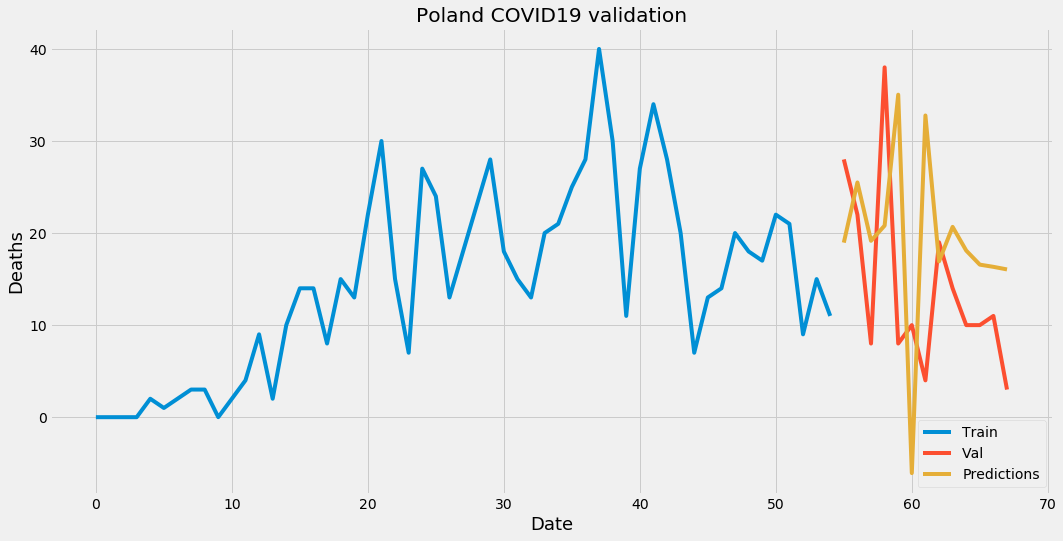

    Deaths  Predictions
55      28    18.962156
56      22    25.499287
57       8    19.160215
58      38    20.810913
59       8    35.029305
60      10    -6.074331
61       4    32.772144
62      19    16.923435
63      14    20.671448
64      10    18.097193
65      10    16.569157
66      11    16.330940
67       3    16.050343


In [8]:
# get the model prediction
preprocessing_data.get_prediction_array(lstm.model.predict(preprocessing_data.x_test))

# rescale the prediction array
preprocessing_data.rescale()

# plot validation set
preprocessing_data.plot_prediction('Poland COVID19 validation')

# print validation set
preprocessing_data.show_valid_data()

# calculate the forecast fot the next 40 days
predictor = Predictor(40, preprocessing_data)


In [9]:
# read covid19 data in Poland from 17.03.2020 to 24.05.2020
poland_data = Data_Reader_Poland('covid19_poland/covid19_poland.csv')

# transform data
preprocessing_data_poland = Data_Preprocessing(poland_data.delta, 0.8)

# create neural network
lstm_poland = My_LSTM(preprocessing_data_poland, 200, 200, 200, 100)

Train on 48 samples, validate on 13 samples
Epoch 1/100
48/48 [==============================] - 2s 45ms/step - loss: 0.0557 - mean_absolute_error: 0.1847 - val_loss: 0.0354 - val_mean_absolute_error: 0.1359
Epoch 2/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0361 - mean_absolute_error: 0.1610 - val_loss: 0.0339 - val_mean_absolute_error: 0.1327
Epoch 3/100
48/48 [==============================] - 1s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.1642 - val_loss: 0.0315 - val_mean_absolute_error: 0.1627
Epoch 4/100
48/48 [==============================] - 1s 17ms/step - loss: 0.0510 - mean_absolute_error: 0.1786 - val_loss: 0.0317 - val_mean_absolute_error: 0.1632
Epoch 5/100
48/48 [==============================] - 1s 19ms/step - loss: 0.0472 - mean_absolute_error: 0.1608 - val_loss: 0.0372 - val_mean_absolute_error: 0.1759
Epoch 6/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.1539 - val_loss: 0.0282 - val_

48/48 [==============================] - 1s 13ms/step - loss: 0.0309 - mean_absolute_error: 0.1392 - val_loss: 0.0337 - val_mean_absolute_error: 0.1492
Epoch 51/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0284 - mean_absolute_error: 0.1354 - val_loss: 0.0315 - val_mean_absolute_error: 0.1395
Epoch 52/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0252 - mean_absolute_error: 0.1233 - val_loss: 0.0393 - val_mean_absolute_error: 0.1638
Epoch 53/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0216 - mean_absolute_error: 0.1146 - val_loss: 0.0317 - val_mean_absolute_error: 0.1400
Epoch 54/100
48/48 [==============================] - 1s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.1182 - val_loss: 0.0358 - val_mean_absolute_error: 0.1586
Epoch 55/100
48/48 [==============================] - 1s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.1152 - val_loss: 0.0482 - val_mean_absolute_error: 0.1935
Epoch 56/100
48/48 [===

Epoch 100/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0198 - mean_absolute_error: 0.1132 - val_loss: 0.0279 - val_mean_absolute_error: 0.1136


# Poland COVID19 data

C:\Users\shyrokoa\CONDA3\envs\covid19\lib\site-packages\ipykernel_launcher.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


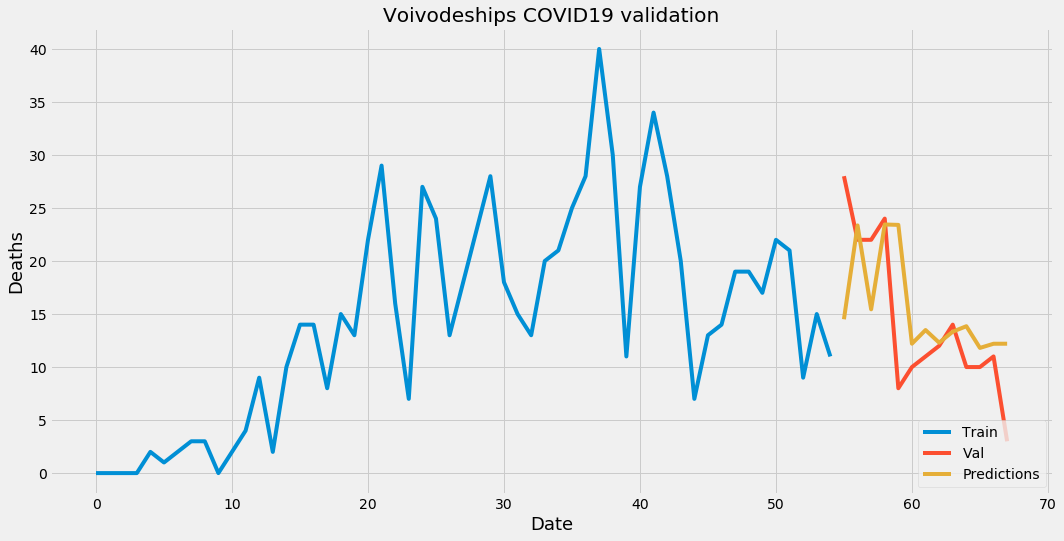

    Deaths  Predictions
55      28    14.507270
56      22    23.356840
57      22    15.445958
58      24    23.445799
59       8    23.406960
60      10    12.204585
61      11    13.490276
62      12    12.299342
63      14    13.337364
64      10    13.851639
65      10    11.804197
66      11    12.198343
67       3    12.201151


In [10]:
# get the model prediction
preprocessing_data_poland.get_prediction_array(lstm_poland.model.predict(preprocessing_data_poland.x_test))

# rescale the prediction array
preprocessing_data_poland.rescale()

# plot validation set
preprocessing_data_poland.plot_prediction('Voivodeships COVID19 validation')

# print validation set
preprocessing_data_poland.show_valid_data()

# calculate the forecast fot the next 40 days
predictor_poland = Predictor(40, preprocessing_data_poland)

# Forecasting plot

C:\Users\shyrokoa\CONDA3\envs\covid19\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


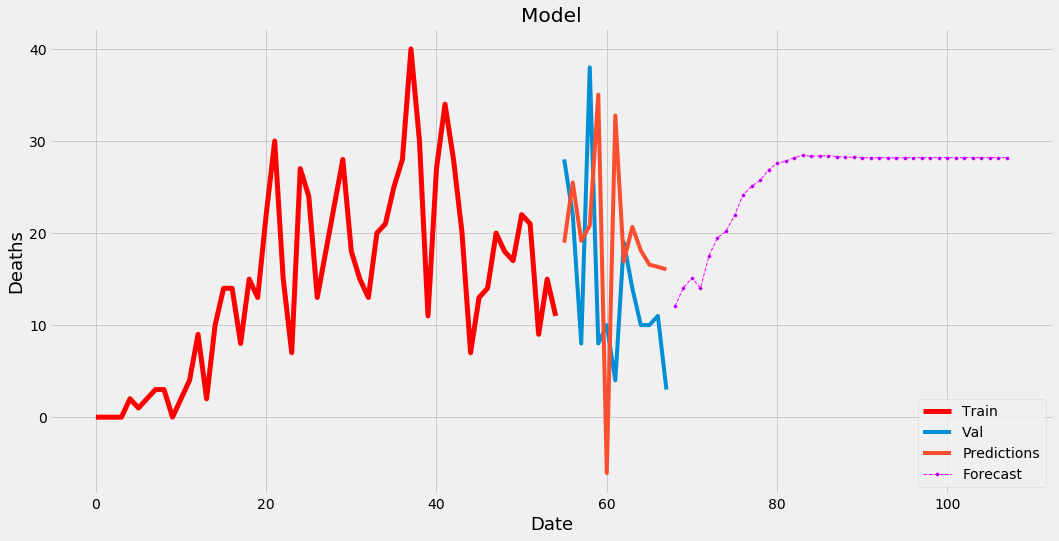

In [11]:
# plot forecasting
predictor.plot()

C:\Users\shyrokoa\CONDA3\envs\covid19\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


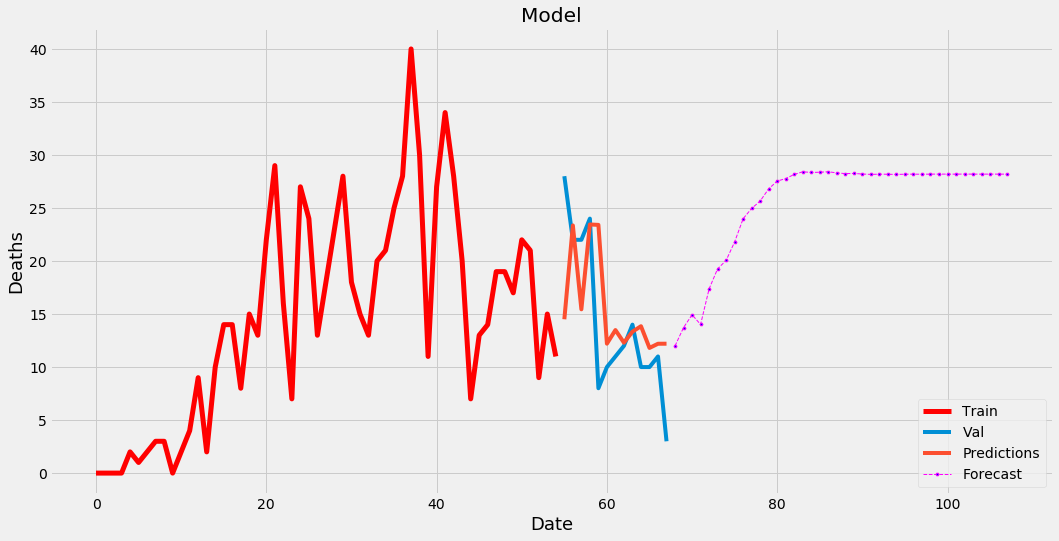

In [12]:
# plot forecasting
predictor_poland.plot()

In [13]:
# evaluate the model
_ ,train_mae = lstm.model.evaluate(preprocessing_data.x_train, preprocessing_data.y_train, verbose=0)
_ ,test_mae = lstm.model.evaluate(preprocessing_data.x_test, preprocessing_data.y_test, verbose=0)

print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_mae, test_mae))

Train accuracy: 0.139, Test accuracy: 0.297


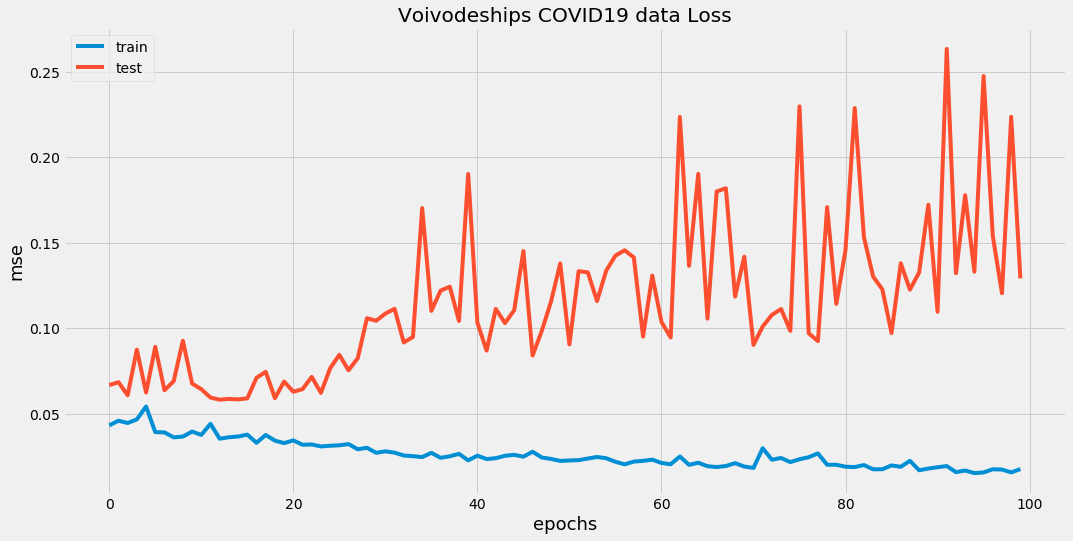

In [14]:
# plot loss during training
plt.figure(figsize=(16,8))
plt.xlabel('epochs', fontsize=18)
plt.ylabel('mse', fontsize=18)
plt.title('Voivodeships COVID19 data Loss')
plt.plot(lstm.history.history['loss'], label='train')
plt.plot(lstm.history.history['val_loss'], label='test')
plt.legend()

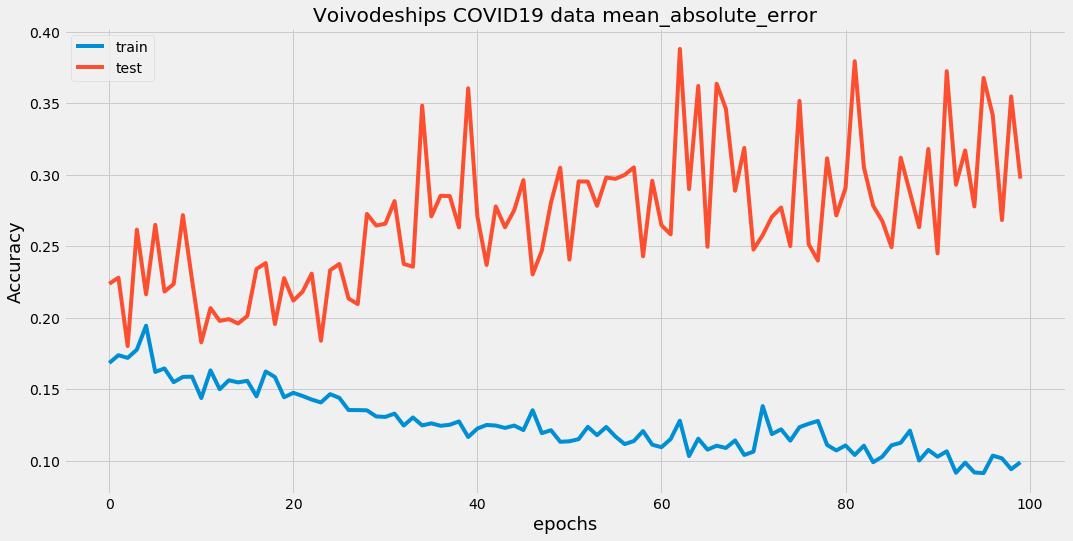

In [15]:
# plot accuracy during training
plt.figure(figsize=(16,8))
plt.title('Voivodeships COVID19 data mean_absolute_error')
plt.xlabel('epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.plot(lstm.history.history['mean_absolute_error'], label='train')
plt.plot(lstm.history.history['val_mean_absolute_error'], label='test')
plt.legend()
plt.show()

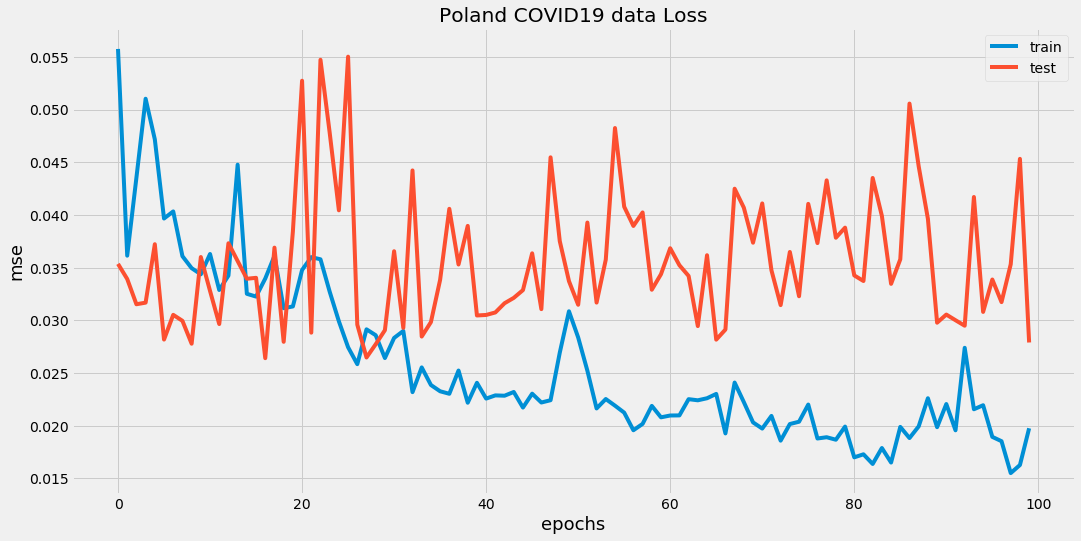

In [16]:
# plot loss during training
plt.figure(figsize=(16,8))
plt.xlabel('epochs', fontsize=18)
plt.ylabel('mse', fontsize=18)
plt.title('Poland COVID19 data Loss')
plt.plot(lstm_poland.history.history['loss'], label='train')
plt.plot(lstm_poland.history.history['val_loss'], label='test')
plt.legend()

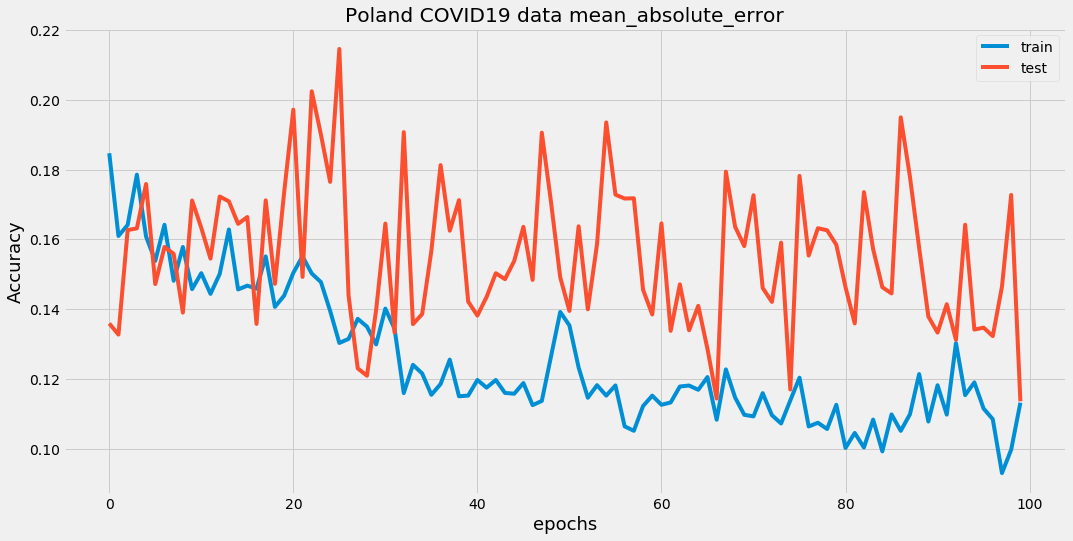

In [17]:
# plot accuracy during training
plt.figure(figsize=(16,8))
plt.title('Poland COVID19 data mean_absolute_error')
plt.xlabel('epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.plot(lstm_poland.history.history['mean_absolute_error'], label='train')
plt.plot(lstm_poland.history.history['val_mean_absolute_error'], label='test')
plt.legend()
plt.show()

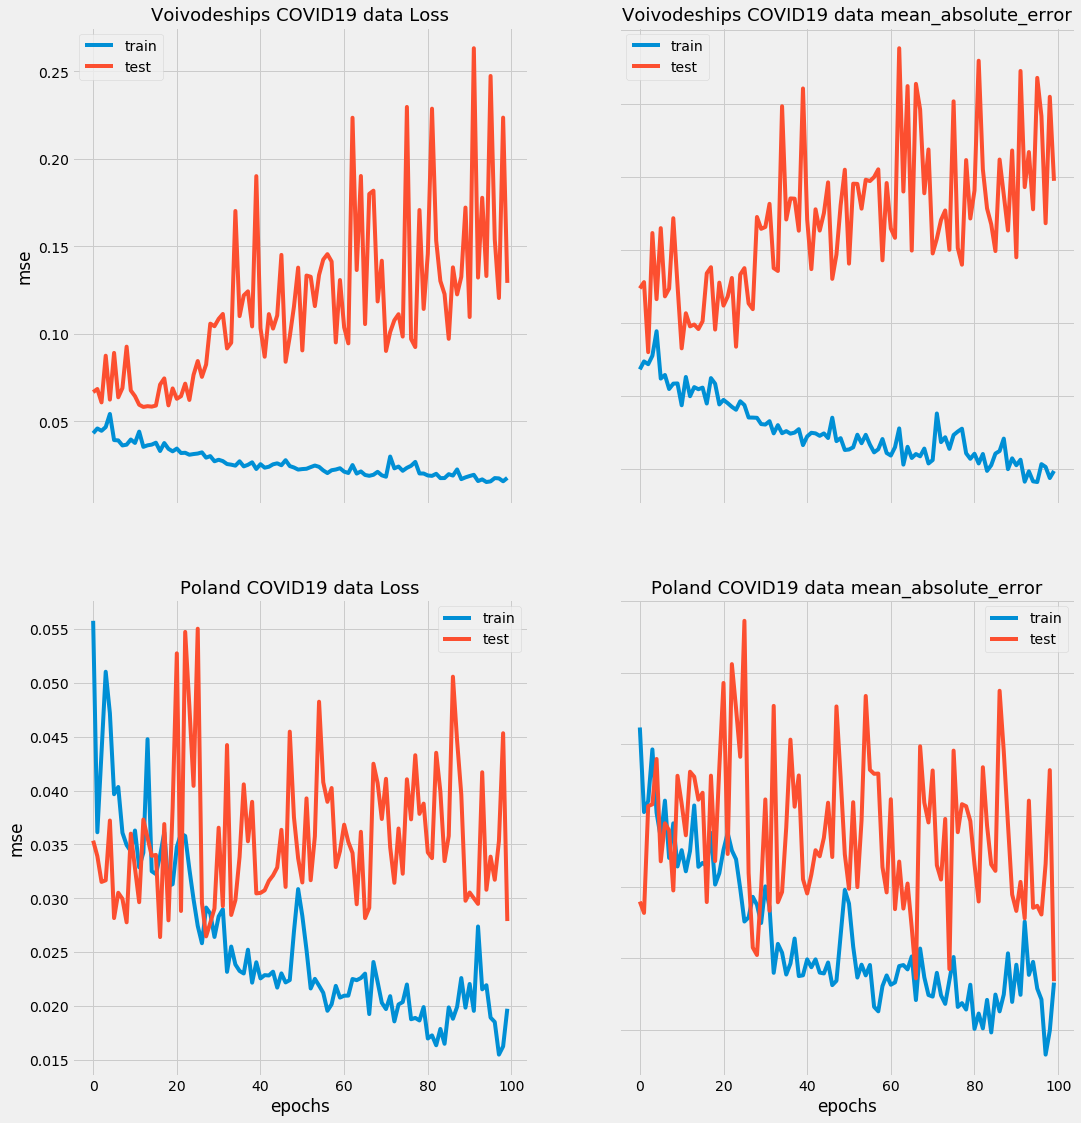

In [18]:
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(16,18))

axs[0, 0].set_title('Voivodeships COVID19 data Loss', fontsize=18)
axs[0, 0].set(ylabel = 'mse')
axs[0, 0].plot(lstm.history.history['loss'], label='train')
axs[0, 0].plot(lstm.history.history['val_loss'], label='test')
axs[0, 0].legend()

axs[0, 1].set_title('Voivodeships COVID19 data mean_absolute_error', fontsize=18)
axs[0, 1].set(ylabel = 'Accuracy')
axs[0, 1].plot(lstm.history.history['mean_absolute_error'], label='train')
axs[0, 1].plot(lstm.history.history['val_mean_absolute_error'], label='test')
axs[0, 1].legend()

axs[1, 0].set_title('Poland COVID19 data Loss', fontsize=18)
axs[1, 0].set(ylabel = 'mse')
axs[1, 0].plot(lstm_poland.history.history['loss'], label='train')
axs[1, 0].plot(lstm_poland.history.history['val_loss'], label='test')
axs[1, 0].legend()

axs[1, 1].set_title('Poland COVID19 data mean_absolute_error', fontsize=18)
axs[1, 1].set(ylabel = 'Accuracy')
axs[1, 1].plot(lstm_poland.history.history['mean_absolute_error'], label='train')
axs[1, 1].plot(lstm_poland.history.history['val_mean_absolute_error'], label='test')
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [24]:
print("%s: %.2f%%" % (lstm.model.metrics_names[0], lstm.history.history.get('val_loss')[0]*100))
cvscores = []
cvscores.append(lstm.history.history.get('val_loss')[0] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

loss: 6.68%
6.68% (+/- 0.00%)


In [20]:
# Voevodeships error using 2 methods
print(f'Voevodeships MSE: {preprocessing_data.mse_()}')
print(f'Voevodeships RMSE: {preprocessing_data.rmse()}')
print(f'Voevodeships NRMSE: {preprocessing_data.nrmse()}')
print(f'Voevodeships ME: {preprocessing_data.me()}')
print(f'Voevodeships MAE: {preprocessing_data.mae()}')

Voevodeships MSE: 0.12654270919469687
Voevodeships RMSE: 0.35572842056082177
Voevodeships NRMSE: 0.40654676635522485
Voevodeships ME: -0.12654270919469687
Voevodeships MAE: 0.30391124389933416


In [21]:
# Poland error using 2 methods
print(f'Voevodeships MSE: {preprocessing_data_poland.mse_()}')
print(f'Voevodeships RMSE: {preprocessing_data_poland.rmse()}')
print(f'Voevodeships NRMSE: {preprocessing_data_poland.nrmse()}')
print(f'Voevodeships ME: {preprocessing_data_poland.me()}')
print(f'Voevodeships MAE: {preprocessing_data_poland.mae()}')

Voevodeships MSE: 0.03182639296238237
Voevodeships RMSE: 0.1783995318446278
Voevodeships NRMSE: 0.2854392509514045
Voevodeships ME: -0.03182639296238237
Voevodeships MAE: 0.16822556613465034
